# Racial segregation in US Cities Today 
-  By Siddharth Prasad | Div B

In [1]:
# project setup 
import pandas as pd 

In [2]:
# import chicago data 
chicago_df = pd.read_csv("data/prepped/chicago_race.csv")

# printing the first five rows
chicago_df.head(5)

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939


In [3]:
total_white_people = chicago_df["pop.white"].sum()
print("There are ",total_white_people,"white people")

total_not_white_people = chicago_df["pop.not.white"].sum()
print("There are ",total_not_white_people,"non white people")

diversity_ratio = total_white_people/total_not_white_people
print("The Diversity Ratio is ",diversity_ratio)

There are  2513996 white people
There are  2134618 non white people
The Diversity Ratio is  1.1777264128757463


# Measuring chicago's Interaction Index

In [4]:
total_minority_pop = chicago_df["pop.not.white"].sum()
chicago_df["interaction_index"]= (chicago_df["pop.not.white"]/total_minority_pop)*(chicago_df["pop.white"]/chicago_df["pop"])

chicago_df.head(5)

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white,interaction_index
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550,0.000695
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036,0.000325
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106,0.000729
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366,0.000528
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939,0.000249


In [5]:
interaction_index_of_chicago=chicago_df["interaction_index"].sum()
interaction_index_of_chicago

0.33621530101878605

In [6]:
import os

In [7]:
city_file_name_list = os.listdir("data/prepped/")
city_file_name_list

['baltimore_race.csv',
 'charleston_race.csv',
 'chicago_race.csv',
 'columbus_race.csv',
 'dayton_race.csv',
 'denver_race.csv',
 'kc_race.csv',
 'memphis_race.csv',
 'milwaukee_race.csv',
 'ok_city_race.csv',
 'pittsburgh_race.csv',
 'st_louis_race.csv',
 'syracuse_race.csv',
 'wichita_race.csv']

In [8]:
def print_interaction_indexes():
    
    city_file_name_list= os.listdir("data/prepped/")
    
    # For loop 
    # for each city
    for city_file_name in city_file_name_list:
        
        # import the city data 
        city_df = pd.read_csv("data/prepped/"+city_file_name)
        
        # calculates the total minority
        total_minority_pop = city_df["pop.not.white"].sum()
        
        
        city_df["interaction_index"]= (chicago_df["pop.not.white"]/total_minority_pop)*(chicago_df["pop.white"]/chicago_df["pop"])
        
        interaction_index_of_city=city_df["interaction_index"].sum()
        
        print(city_file_name.replace("_race.csv","").title()," : ",interaction_index_of_city)

In [9]:
print_interaction_indexes()

Baltimore  :  0.9620054248362198
Charleston  :  0.42563148553003194
Chicago  :  0.33621530101878605
Columbus  :  0.5089064049907801
Dayton  :  0.8938491079467956
Denver  :  0.7687430064280885
Kc  :  0.8257656548513677
Memphis  :  0.5546278673035414
Milwaukee  :  0.6448261658485197
Ok_City  :  0.6411428464508728
Pittsburgh  :  1.433334990759309
St_Louis  :  0.6172726142184136
Syracuse  :  1.4065213844609106
Wichita  :  0.7832307023373242


In [10]:
def print_isolation_indexes():
    
    city_file_name_list= os.listdir("data/prepped/")
    
    # For loop 
    # for each city
    for city_file_name in city_file_name_list:
        
        # import the city data 
        city_df = pd.read_csv("data/prepped/"+city_file_name)
        
        # calculates the total minority
        total_minority_pop = city_df["pop.not.white"].sum()
        
        
        city_df["isolation_index"]= (chicago_df["pop.not.white"]/total_minority_pop)*(chicago_df["pop.not.white"]/chicago_df["pop"])
        
        isolation_index_of_city=city_df["isolation_index"].sum()
        
        print(city_file_name.replace("_race.csv","").title()," : ",isolation_index_of_city)

In [11]:
print_isolation_indexes()

Baltimore  :  0.6231067892994115
Charleston  :  0.8110603746544248
Chicago  :  0.663784698981214
Columbus  :  0.8113422646935053
Dayton  :  1.0959374041414272
Denver  :  1.1294041690321635
Kc  :  1.1725035422592072
Memphis  :  1.0949932701727434
Milwaukee  :  1.0057290605509919
Ok_City  :  1.088448917857534
Pittsburgh  :  2.041547003925747
St_Louis  :  0.8461366284465132
Syracuse  :  1.1745751995927318
Wichita  :  0.45851425314016964


In [12]:
def get_interaction_index(city_df):
     # calculates the total minority
    total_minority_pop = city_df["pop.not.white"].sum()
    #
    city_df["interaction_index"]= (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.white"]/city_df["pop"])
    #
    interaction_index_of_city = city_df["interaction_index"].sum() 
    
    return interaction_index_of_city

    

In [13]:
def get_isolation_index(city_df):
    total_minority_pop = city_df["pop.not.white"].sum()
    
    city_df["isolation_index"]= (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.not.white"]/city_df["pop"])
     #
    isolation_index_of_city=city_df["isolation_index"].sum()
    
    return isolation_index_of_city
    

In [14]:
def get_diversity_ratio(city_df):
    
    total_white_people = city_df["pop.white"].sum()
            

    total_not_white_people = city_df["pop.not.white"].sum()
            
    # Calculating diversity ratio
    diversity_ratio = total_white_people/total_not_white_people
    
    return diversity_ratio
    

In [15]:
def get_metrics_df():
     
     # getting a all the city file name 
    city_file_name_list= os.listdir("data/prepped/")
        
     # making an empty data frame 
    metrics_df=pd.DataFrame(columns=["city","interaction_index","isolation_index","diversity_ratio"])
        
##############################################################################################################################
        
    for city_file_name in city_file_name_list:
        
             # import the city data 
            city_df = pd.read_csv("data/prepped/"+city_file_name)

             #  new row
            new_row = {"city":city_file_name.replace("_race.csv","").title(),
                      "interaction_index":get_interaction_index(city_df) ,
                      "isolation_index":get_isolation_index(city_df) ,
                      "diversity_ratio":get_diversity_ratio(city_df)}
            #
            metrics_df= metrics_df.append(new_row, ignore_index = True)
##############################################################################################################################
    return metrics_df.sort_values(["diversity_ratio"],ascending = True)
    
            
        

In [16]:
get_metrics_df()

,city,interaction_index,isolation_index,diversity_ratio
0,Baltimore,0.217094,0.782906,0.634657
2,Chicago,0.336215,0.663785,1.177726
1,Charleston,0.518106,0.481894,2.051064
3,Columbus,0.537027,0.462973,2.504501
9,Ok_City,0.613472,0.386528,2.534255
8,Milwaukee,0.404241,0.595759,2.770268
11,St_Louis,0.420453,0.579547,3.155248
13,Wichita,0.639562,0.360438,3.729074
5,Denver,0.685280,0.314720,3.744329
7,Memphis,0.481195,0.518805,3.794997


<AxesSubplot:xlabel='diversity_ratio', ylabel='interaction_index'>

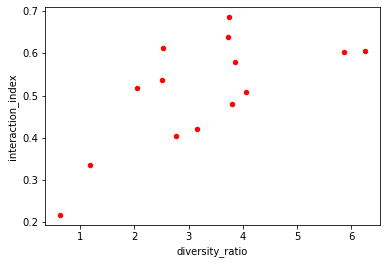

In [17]:
metrics_df = get_metrics_df()
metrics_df .plot.scatter(x='diversity_ratio',y='interaction_index',c='Red')

In [18]:
metrics_df.to_csv("us segregation metrics.csv")